In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [5]:
df.duplicated().sum()

0

In [6]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
336,319,110,3,3.0,2.5,8.79,0
64,325,111,3,3.0,3.5,8.70,0
55,320,103,3,3.0,3.0,7.70,0
106,329,111,4,4.5,4.5,9.18,1
300,309,106,2,2.5,2.5,8.00,0
...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0
192,322,114,5,4.5,4.0,8.94,1
117,290,104,4,2.0,2.5,7.46,0
47,339,119,5,4.5,4.0,9.70,0


In [9]:
y_train

336    0.72
64     0.52
55     0.64
106    0.87
300    0.62
       ... 
323    0.62
192    0.86
117    0.45
47     0.89
172    0.86
Name: Chance of Admit , Length: 320, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [11]:
X_train_trf

array([[0.58      , 0.64285714, 0.5       , ..., 0.375     , 0.63782051,
        0.        ],
       [0.7       , 0.67857143, 0.5       , ..., 0.625     , 0.60897436,
        0.        ],
       [0.6       , 0.39285714, 0.5       , ..., 0.5       , 0.28846154,
        0.        ],
       ...,
       [0.        , 0.42857143, 0.75      , ..., 0.375     , 0.21153846,
        0.        ],
       [0.98      , 0.96428571, 1.        , ..., 0.75      , 0.92948718,
        0.        ],
       [0.64      , 0.64285714, 0.75      , ..., 1.        , 0.74679487,
        1.        ]])

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [53]:
model = Sequential()

model.add(Dense(28,activation='relu',input_dim=7))
model.add(Dropout(0.1))
model.add(Dense(14,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))

In [54]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 28)                224       
                                                                 
 dropout_32 (Dropout)        (None, 28)                0         
                                                                 
 dense_42 (Dense)            (None, 14)                406       
                                                                 
 dropout_33 (Dropout)        (None, 14)                0         
                                                                 
 dense_43 (Dense)            (None, 7)                 105       
                                                                 
 dropout_34 (Dropout)        (None, 7)                 0         
                                                                 
 dense_44 (Dense)            (None, 1)                

In [55]:
model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['accuracy'])
history = model.fit(X_train_trf,y_train, epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 0.2536 - accuracy: 0.0000e+00 - val_loss: 0.1048 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1136 - accuracy: 0.0000e+00 - val_loss: 0.0344 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0787 - accuracy: 0.0000e+00 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0812 - accuracy: 0.0000e+00 - val_loss: 0.0154 - val_accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0702 - accuracy: 0.0000e+00 - val_loss: 0.0149 - val_accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0624 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0583 - accuracy: 0.0000e+00 - val_loss: 

In [56]:
y_pred = model.predict(X_test_trf)
y_pred

3/3 [==============================] - 0s 4ms/step


array([[0.65472233],
       [0.6612031 ],
       [0.73612463],
       [0.5999075 ],
       [0.6601817 ],
       [0.5948285 ],
       [0.6655637 ],
       [0.6343075 ],
       [0.77351975],
       [0.83694005],
       [0.5545733 ],
       [0.8161018 ],
       [0.66837484],
       [0.5189327 ],
       [0.7928434 ],
       [0.59581596],
       [0.6068651 ],
       [0.7308748 ],
       [0.60446703],
       [0.6655387 ],
       [0.83246386],
       [0.7485879 ],
       [0.6325327 ],
       [0.5275548 ],
       [0.7495488 ],
       [0.581178  ],
       [0.5692607 ],
       [0.62894845],
       [0.8488798 ],
       [0.6256274 ],
       [0.6248325 ],
       [0.70914567],
       [0.7133926 ],
       [0.56422395],
       [0.71204066],
       [0.72499436],
       [0.6737771 ],
       [0.7892957 ],
       [0.6125531 ],
       [0.8619133 ],
       [0.7020347 ],
       [0.6446202 ],
       [0.688361  ],
       [0.7549309 ],
       [0.7532308 ],
       [0.6497054 ],
       [0.58580995],
       [0.676

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6208147606653627

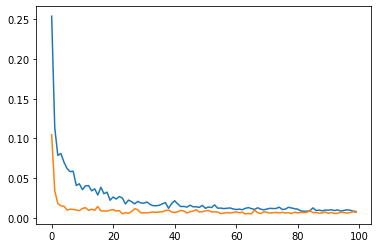

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

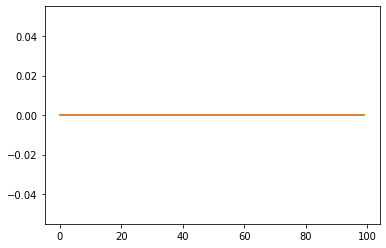

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])